# Section 1 - Least squares linear regression

In [3]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt

In [ ]:
m = 42
x = np.zeros((m,1))
y = np.zeros((m,1))
price_t = 148 #in 1000 rubles per m^2
var = 3000
for i in range(m):
  x[i] = randint(150, 350)
  y[i] = x[i]*price_t + np.random.randn(1)*var



In [ ]:
# # Outlier
# y_max = np.max(y)*1.3
# y[20] = y_max

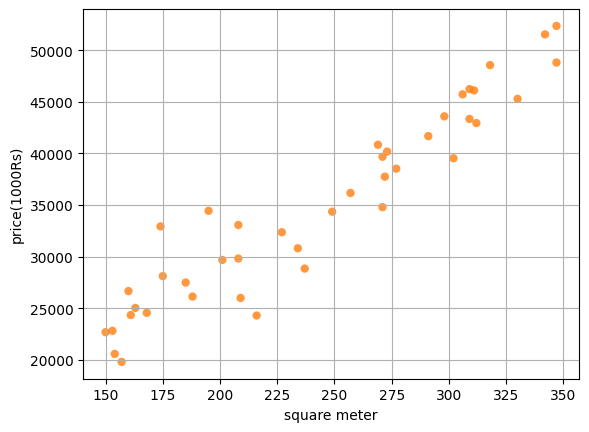

In [ ]:
plt.scatter(x, y, c='tab:orange', alpha=0.8, edgecolors='none')
fig = plt.gcf()
ax = fig.gca()
plt.ylabel('price(1000Rs)')
plt.xlabel('square meter')
plt.grid()
plt.show()
fig.savefig('plot_LinReg.png')

In [ ]:
# Print some test samples
print(x[0:5])
print(y[0:5])

[[163.]
 [257.]
 [161.]
 [298.]
 [209.]]
[[25027.6515357 ]
 [36164.67586907]
 [24331.46123229]
 [43587.83252862]
 [25986.73615   ]]


We compute a fitting line by solving a least square problem of the form

$\min_{\theta_1, \theta_0} \frac{1}{m} \sum_{i=1}^m (y^{(i)} - (\theta_1 x^{(i)} + \theta_0))^2$

Consider the case $m$ (the number of samples) is bigger than the $n$ (the number parameters, here 2): it amounts to solve approximatively the linear system of equation: $A \theta \approx b$ with

- $A=\begin{pmatrix} x^{(1)} & 1 \\ \vdots & \vdots \\ x^{(m)} & 1 \end{pmatrix}$,
- $\theta = \begin{pmatrix} \theta_1 \\ \theta_0 \end{pmatrix}$
- $b=\begin{pmatrix} y^{(1)}  \\ \vdots \\ y^{(m)} \end{pmatrix}$

Problem above can be rewritten as follows:
$\min_{\theta \in \mathbb{R}^2} \| A\theta - b \|_2^2:=f(\theta)$

Assuming that $A$ has linearly independent columns, the unique optimal solution can be derived by computing $\theta^\star$ such that $\nabla_\theta f(\theta^\star) = 0$, which gives

$\theta^\star = (A^T A)^{-1}A^T b = A^\dagger b $, with $A^\dagger$ the Moore–Penrose inverse, or pseudo-inverse, of $A$.

In [ ]:
# Quick solve with pseudoinverse
A = np.concatenate([x,np.ones((m,1))], axis=1)
print("Rank of A: \n", np.linalg.matrix_rank(A))
theta_opti = np.linalg.pinv(A)@y
print("optimal theta: \n",theta_opti)

Rank of A: 
 2
optimal theta: 
 [[ 137.89963439]
 [1519.25617072]]


In [ ]:
y_pred = A@theta_opti

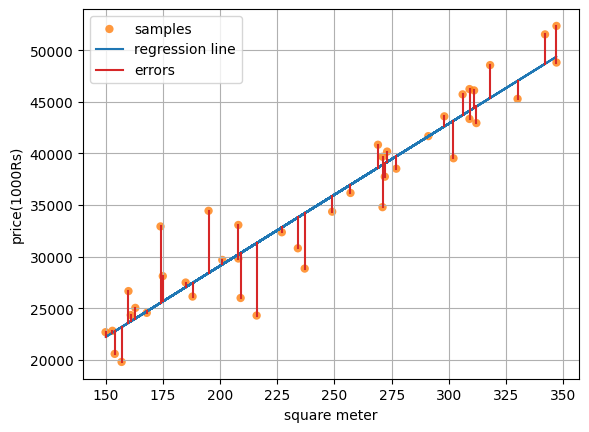

In [ ]:
plt.scatter(x, y, c='tab:orange', alpha=0.8, edgecolors='none',label='samples')
plt.plot(x, y_pred,label='regression line')
for i in range(m):
    err_1_x = [x[i],x[i]]
    err_2_y = [y_pred[i],y[i]]
    if i == m-1:
      plt.plot(err_1_x, err_2_y, c='tab:red', label='errors')
    else:
      plt.plot(err_1_x, err_2_y, c='tab:red')



fig = plt.gcf()
ax = fig.gca()
plt.ylabel('price(1000Rs)')
plt.xlabel('square meter')
ax.legend()
plt.grid()
plt.show()
fig.savefig('plot_LinReg_2.png')

# Section 2 - Hald data set

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# read the data set in text format
df = pd.read_table('https://www.biz.uiowa.edu/faculty/jledolter/RegressionModeling/Data/Chapter7/hald.txt', header=None)

df1 = df.drop(index=[0])

In [7]:
table = df1.to_numpy(dtype='float32')

In [8]:
m, n = table.shape
y = table[:,0]
x = table[:,1:]

In [ ]:
# Write your code below to compute the multilinear regression